In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from keras.layers import BatchNormalization
from tensorflow import keras
# from keras.initializers import RandomNormal
# from keras.initializers import glorot_norma
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout



In [110]:
raw_data=pd.read_csv('gail_data.csv')
dataset_1=raw_data.copy()
dataset_1.head()

,date,time,open,high,low,close,volume
0,2017-01-02,09:15:00,124.55,124.55,123.80,124.00,21398.0
1,2017-01-02,09:16:00,123.85,124.10,123.85,124.05,18269.0
2,2017-01-02,09:17:00,124.05,124.05,123.40,123.55,16666.0
3,2017-01-02,09:18:00,123.55,123.85,123.55,123.65,27959.0
4,2017-01-02,09:19:00,123.65,123.80,123.60,123.60,7856.0


In [111]:
dataset_1['date']=pd.to_datetime(dataset_1['date'])
dataset_2=dataset_1.copy()

In [112]:
dataset_2['year']=dataset_2['date'].dt.year
dataset_2['month']=dataset_2['date'].dt.month
dataset_2.head()

,date,time,open,high,low,close,volume,year,month
0,2017-01-02,09:15:00,124.55,124.55,123.80,124.00,21398.0,2017,1
1,2017-01-02,09:16:00,123.85,124.10,123.85,124.05,18269.0,2017,1
2,2017-01-02,09:17:00,124.05,124.05,123.40,123.55,16666.0,2017,1
3,2017-01-02,09:18:00,123.55,123.85,123.55,123.65,27959.0,2017,1
4,2017-01-02,09:19:00,123.65,123.80,123.60,123.60,7856.0,2017,1


In [113]:
month={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
for key,value in month.items():
   dataset_2.loc[dataset_2['month']==key,'month'] = value

C:\Users\Reza-pc\AppData\Local\Temp\ipykernel_4360\3377807234.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dataset_2.loc[dataset_2['month']==key,'month'] = value


In [114]:
dataset_2['diff_close']=dataset_2['close'].diff()
dataset_2

,date,time,open,high,low,close,volume,year,month,diff_close
0,2017-01-02,09:15:00,124.55,124.55,123.80,124.00,21398.0,2017,January,NaN
1,2017-01-02,09:16:00,123.85,124.10,123.85,124.05,18269.0,2017,January,0.05
2,2017-01-02,09:17:00,124.05,124.05,123.40,123.55,16666.0,2017,January,-0.50
3,2017-01-02,09:18:00,123.55,123.85,123.55,123.65,27959.0,2017,January,0.10
4,2017-01-02,09:19:00,123.65,123.80,123.60,123.60,7856.0,2017,January,-0.05
...,...,...,...,...,...,...,...,...,...,...
370541,2021-01-01,15:25:00,123.70,123.80,123.65,123.75,17293.0,2021,January,0.00
370542,2021-01-01,15:26:00,123.75,123.80,123.55,123.55,31159.0,2021,January,-0.20
370543,2021-01-01,15:27:00,123.60,123.60,123.50,123.55,26707.0,2021,January,0.00
370544,2021-01-01,15:28:00,123.55,123.60,123.25,123.25,33328.0,2021,January,-0.30


In [115]:
dataset_1.info()
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    370546 non-null  datetime64[ns]
 1   time    370546 non-null  object        
 2   open    370405 non-null  float64       
 3   high    370405 non-null  float64       
 4   low     370405 non-null  float64       
 5   close   370405 non-null  float64       
 6   volume  370405 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 19.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        370546 non-null  datetime64[ns]
 1   time        370546 non-null  object        
 2   open        370405 non-null  float64       
 3   high        370405 non-null  float64       
 4   low

In [116]:
dataset_2.describe(percentiles=[.10,.25,.50,.75,.90],include='all').T

,count,unique,top,freq,mean,min,10%,25%,50%,75%,90%,max,std
date,370546,NaN,NaN,NaN,2019-01-02 14:30:04.537088512,2017-01-02 00:00:00,2017-05-26 00:00:00,2018-01-01 00:00:00,2019-01-03 00:00:00,2020-01-08 00:00:00,2020-08-12 00:00:00,2021-01-01 00:00:00,NaN
time,370546,496,13:23:00,988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open,370405.0,NaN,NaN,NaN,143.686895,65.35,93.5,123.15,146.8,171.15,179.9,199.45,31.837122
high,370405.0,NaN,NaN,NaN,143.773901,66.4,93.6,123.2,146.85,171.25,180.0,199.65,31.843564
low,370405.0,NaN,NaN,NaN,143.59664,65.35,93.45,123.1,146.7,171.05,179.75,199.4,31.831318
close,370405.0,NaN,NaN,NaN,143.68533,66.05,93.5,123.15,146.8,171.15,179.9,199.45,31.836113
volume,370405.0,NaN,NaN,NaN,22597.238234,0.0,2124.0,4338.0,9723.0,22691.0,50353.6,5494054.0,49154.76594
year,370546.0,NaN,NaN,NaN,2018.50889,2017.0,2017.0,2018.0,2019.0,2020.0,2020.0,2021.0,1.124086
month,370546,12,January,33750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diff_close,370394.0,NaN,NaN,NaN,-0.000067,-13.4,-0.15,-0.05,0.0,0.05,0.15,8.4,0.167257


In [117]:
print('shape :',dataset_1.shape)
print('shape :',dataset_2.shape)

shape : (370546, 7)
shape : (370546, 10)


In [118]:
print(dataset_1.isna().sum())
print('-'*30)
print(dataset_2.isna().sum())

date        0
time        0
open      141
high      141
low       141
close     141
volume    141
dtype: int64
------------------------------
date            0
time            0
open          141
high          141
low           141
close         141
volume        141
year            0
month           0
diff_close    152
dtype: int64


In [119]:
for x in dataset_1.columns:
  dataset_1[x]=dataset_1[x].fillna(dataset_1[x].mode()[0])


In [1]:
# plt.figure(figsize=(6,5))
# color = "#AE0000"
# color_t = "#FFC900"
# text_color = "#006210"
# custom_palette = ["#00D5D1", "#15FACD"]
# plt.scatter(dataset_1['open'],dataset_1['close'] , color=color)
# plt.xticks(rotation=45, ha='right', color=text_color)
# plt.yticks(rotation=0, ha='right', color=text_color)
# plt.xlabel('open ', color=color_t, fontsize=18)
# plt.ylabel('close' , color=color_t, fontsize=18)
# plt.grid()
# plt.show()
# HighAdjCloseNoise = dataset_1[(dataset_1['open'] >= 0) & (dataset_1['open'] <= 70)&(dataset_1['close'] >= 80) & (dataset_1['close'] <= 90)]
# dataset_1 = dataset_1.drop(HighAdjCloseNoise.index)
# plt.figure(figsize=(6,5))
# plt.scatter(dataset_1['open'],dataset_1['close'] , color=color)
# plt.xticks(rotation=45, ha='right', color=text_color)
# plt.yticks(rotation=0, ha='right', color=text_color)
# plt.xlabel('open ', color=color_t, fontsize=18)
# plt.ylabel('close' , color=color_t, fontsize=18)
# plt.grid()
# plt.show()

In [1]:
# fig = go.Figure()
# fig.add_trace(
#     go.Scatter(x=list(dataset_1.date),
#                y=list(dataset_1.high),
#                name="High",
#                line=dict(color="#33CFA5")))

# fig.add_trace(
#     go.Scatter(x=list(dataset_1.date),
#                y=[dataset_1.high.mean()] * len(dataset_1.index),
#                name="High Average",
#                visible=False,
#                line=dict(color="#33CFA5", dash="dash")))

# fig.add_trace(
#     go.Scatter(x=list(dataset_1.date),
#                y=list(dataset_1.low),
#                name="low",
#                line=dict(color="#F06A6A")))

# fig.add_trace(
#     go.Scatter(x=list(dataset_1.date),
#                y=[dataset_1.low.mean()] * len(dataset_1.index),
#                name="low Average",
#                visible=False,
#                line=dict(color="#F06A6A", dash="dash")))

# high_annotations = [dict(x="2021-01-01",
#                          y=dataset_1.high.mean(),
#                          xref="x", yref="y",
#                          text="High Average:<br> %.3f" % dataset_1.high.mean(),
#                          ax=0, ay=-40),
#                     dict(x=dataset_1.date[dataset_1.high.idxmax()],
#                          y=dataset_1.high.max(),
#                          xref="x", yref="y",
#                          text="High Max:<br> %.3f" % dataset_1.high.max(),
#                          ax=-40, ay=-40)]
# low_annotations = [dict(x="2017-01-02",
#                         y=dataset_1.low.mean(),
#                         xref="x", yref="y",
#                         text="Low Average:<br> %.3f" % dataset_1.low.mean(),
#                         ax=0, ay=40),
#                    dict(x=dataset_1.date[dataset_1.high.idxmin()],
#                         y=dataset_1.low.min(),
#                         xref="x", yref="y",
#                         text="Low Min:<br> %.3f" % dataset_1.low.min(),
#                         ax=0, ay=40)]

# fig.update_layout(
#     updatemenus=[
#         dict(
#             active=0,
#             buttons=list([
#                 dict(label="None",
#                      method="update",
#                      args=[{"visible": [True, False, True, False]},
#                            {"title": "Yahoo",
#                             "annotations": []}]),
#                 dict(label="High",
#                      method="update",
#                      args=[{"visible": [True, True, False, False]},
#                            {"title": "Yahoo High",
#                             "annotations": high_annotations}]),
#                 dict(label="Low",
#                      method="update",
#                      args=[{"visible": [False, False, True, True]},
#                            {"title": "Yahoo Low",
#                             "annotations": low_annotations}]),
#                 dict(label="Both",
#                      method="update",
#                      args=[{"visible": [True, True, True, True]},
#                            {"title": "Yahoo",
#                             "annotations": high_annotations + low_annotations}]),
#             ]),
#         )
#     ])

# fig.update_layout(title_text="High,Low")

# fig.show()


In [2]:

# plt.figure(figsize=(15, 10))
# decomposition = seasonal_decompose(dataset_1['high'], period=150)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(4, 1, 1)
# sns.lineplot(dataset_1['high'])


# plt.subplot(4, 1, 2)
# plt.plot(trend, label='trend')
# plt.title('This feature returns the trend and shows its changes')


# plt.subplot(4, 1, 3)
# plt.plot(seasonal, label='seasonal')
# plt.title('This feature returns seasonal samples and shows recurring patterns in the time series')

# plt.subplot(4, 1, 4)
# plt.plot(residual,label='residual')
# plt.title('This feature shows the difference between the original time series and the trend and seasonality and includes the random components of the time series.')

# plt.tight_layout()

(<Figure size 1200x300 with 1 Axes>, <Axes: >)

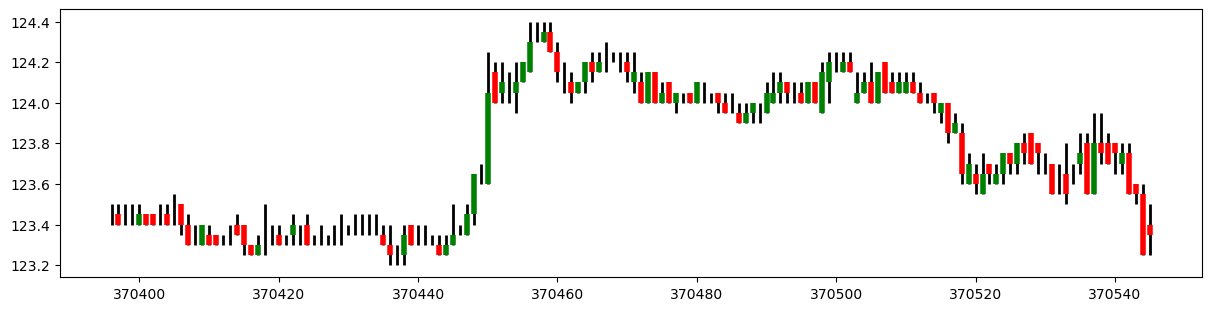

In [123]:
def plot_ohlc(data):
    fig1, ax1 = plt.subplots(figsize=(12,  3), constrained_layout=True)
    
    for i in data.index:

        ax1.vlines(i, ymin=data["low"][i], ymax=data["high"][i], color="black", linewidth=2)
        if data["close"][i] > data["open"][i]:
            ax1.vlines(i, ymin=data["open"][i], ymax=data["close"][i], color="green", linewidth=4)
        elif data["close"][i] < data["open"][i]:
            ax1.vlines(i, ymin=data["close"][i], ymax=data["open"][i], color="red", linewidth=4)
        else:
            ax1.vlines(i, ymin=data["open"][i], ymax=data["close"][i]+0.000001, color="red", linewidth=4)
            
    return fig1, ax1
plot_ohlc(dataset_1[-150:])


In [124]:
# fig = go.Figure(data=[go.Candlestick(x=dataset_2['date'],
#                 open=dataset_2['open'], high=dataset_2['high'],
#                 low=dataset_2['low'], close=dataset_2['close'])
#                      ])

# fig.update_layout(xaxis_rangeslider_visible=False)
# fig.show()

In [125]:
x=dataset_1.drop(['time','date','close'],axis=1)
y=dataset_1['close']
scale=StandardScaler()
x_scale=scale.fit_transform(x)
X_train, X_test, Y_train, Y_test =train_test_split(x_scale, y, test_size=0.3) 

In [126]:
las=LassoLarsCV()
li=LinearRegression()
ri=Ridge()
la=Lasso()
ra=RandomForestRegressor(random_state=42)
vo=VotingRegressor(estimators=[
    ('las',las),
    ('li',li),
    ('ri',ri),
    ('la',la),
    ('ra',ra)
],)
i=0
vo.fit(X_train,Y_train)
for x in (las,li,ri,la,ra,vo):
    x.fit(X_train,Y_train)
    p=x.predict(X_test)
    print(f"{x.__class__.__name__} : {mean_squared_error(p,Y_test)}")

LassoLarsCV : 0.004913281753343722
LinearRegression : 0.004913281752901303
Ridge : 0.005983564150398106
Lasso : 1.0260675720595491
RandomForestRegressor : 0.006420493936473853
VotingRegressor : 0.04648224821883612


In [127]:
estimators=[
    ('LassoLarsCV',LassoLarsCV()),
    ('LinearRegression',LinearRegression()),
    ('Ridge',Ridge()),
    
]
Stak=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
Stak.fit(X_train,Y_train)
y_pred=Stak.predict(X_test)

In [128]:
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)
print("mse : ", mse)
print('mae :',mae)
print('r2 :',r2)

mse :  0.004918890477784186
mae : 0.0487963301354989
r2 : 0.9999951523062857


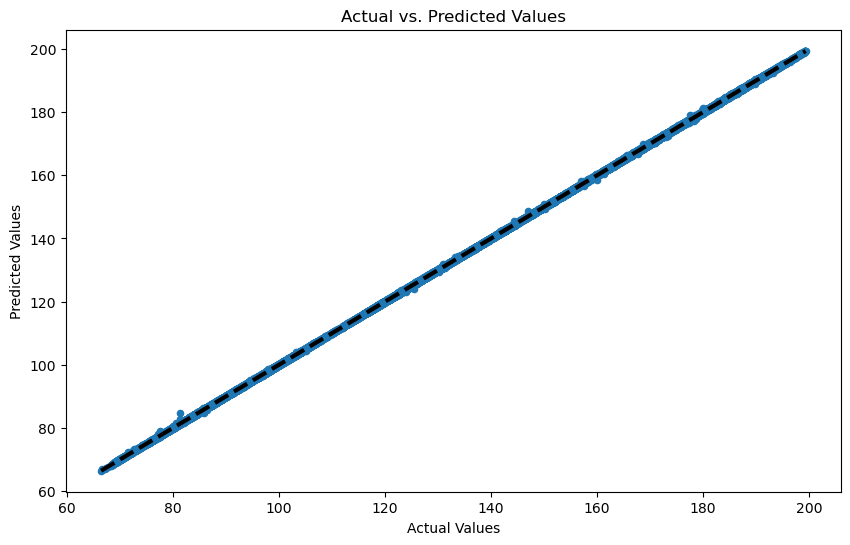

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, s=20)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()